An object of class Seurat 
20625 features across 4568 samples within 1 assay 
Active assay: RNA (20625 features, 0 variable features)

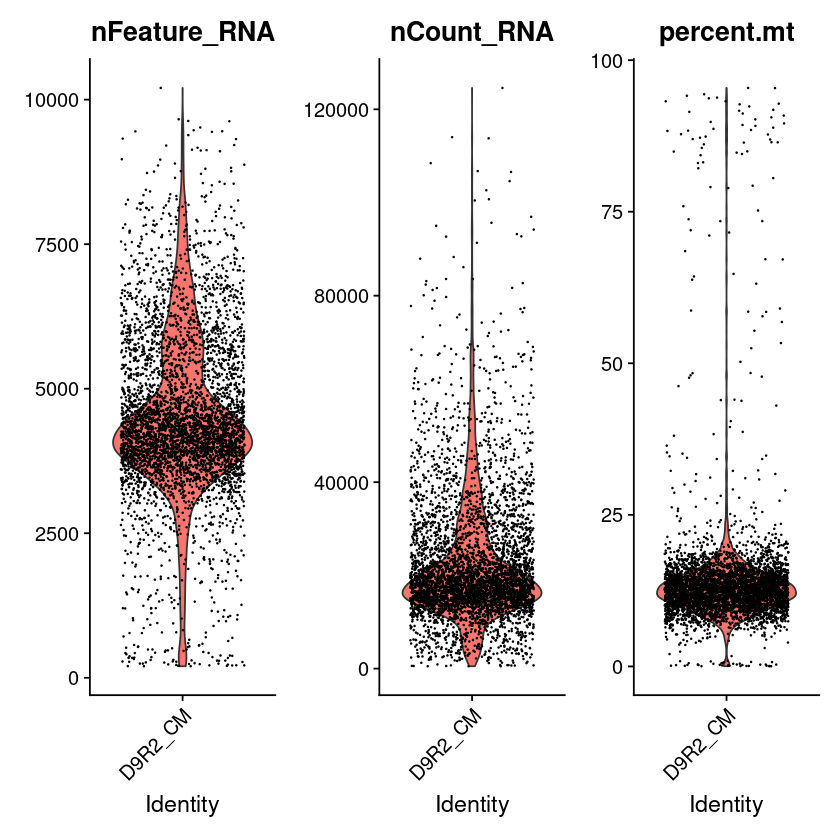

In [3]:
library(dplyr)
library(Seurat)
library(patchwork)

# importing data 
D9R2_CM.data <- Read10X(data.dir = "/volume/DAY_0/D9R2_CM/D9R2_CM_DATA")
D9R2_CM <- CreateSeuratObject(counts = D9R2_CM.data, project = "D9R2_CM", min.cells = 3, min.features = 200)
D9R2_CM

# Violin Plot
D9R2_CM[["percent.mt"]] <- PercentageFeatureSet(D9R2_CM, pattern = "^MT-")

VlnPlot(D9R2_CM, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

# SUBSET DATA
D9R2_CM <- subset(D9R2_CM, subset = nFeature_RNA > 1250 & nFeature_RNA < 9000 & percent.mt < 27)

# SAVE
saveRDS(D9R2_CM, file = "/volume/DAY_0/D9R2_CM/D9R2_CM_final.rds")